# Intro

The following notebook is used to generate plots compare the results of the various agents.


# Get Results - Baseline

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from collections import defaultdict
import pandas as pd
import seaborn as sns
from itertools import chain
%matplotlib inline

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  
        pickle.dump(obj, outp)

def load_object(filename):
    with open(filename, 'rb') as outp:  
        object_ = pickle.load(outp)
    return object_

# Action Plots of TD3 Baseline Agent

In [28]:
root = "./"

actions = load_object(root + 'td3_baseline_1000/ep_actions_1000')

rewards = load_object(root + 'td3_baseline_1000/ep_rewards_1000')

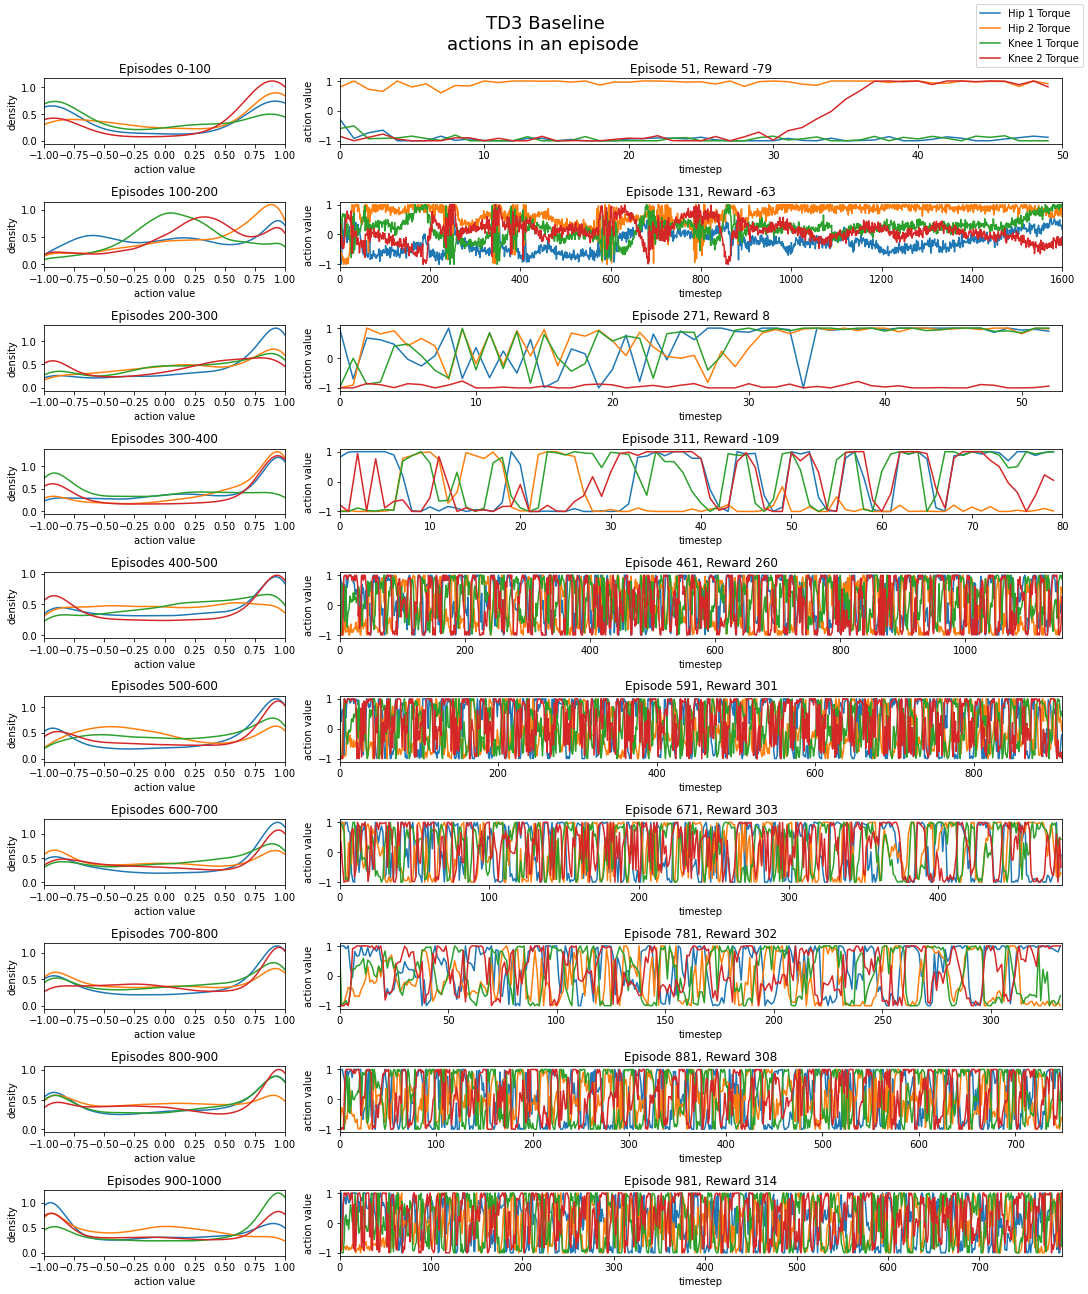

In [29]:


episodes = actions.keys()

timeframes = list(range(0, 1100, 100))
timeframe_sets = [[x, y] for x, y in zip(timeframes[:-1], timeframes[1:])]

action_sets = defaultdict(list)

for start, end in timeframe_sets:
    episodes_between_range = [x for x in episodes if x >= start and x < end]
    actions_between_range = [actions[x] for x in episodes_between_range]
    combined_actions = list(chain.from_iterable(actions_between_range))
    
    action_sets[start, end] = combined_actions

# plot actions of various episodes
action_sets = action_sets
agent_name = 'TD3 Baseline'

# plot episode actions through several episodes and its density  
fig, axs = plt.subplots(nrows= len(action_sets), 
                          gridspec_kw={'width_ratios': [1, 3]},
                      ncols=2, figsize=(15, 18))
plt.subplots_adjust(hspace=1.1)

fig.suptitle(f"{agent_name}\nactions in an episode ", fontsize=18, y=0.99)
for k_episode_start_end, ax1, ax in zip(action_sets.keys(), axs.ravel()[::2], axs.ravel()[1::2]):
    # Get episode range
    k_episode_start, k_episode_end = k_episode_start_end[0], k_episode_start_end[1]
    # Store Results
    df = pd.DataFrame(action_sets[k_episode_start, k_episode_end])
    # Update Index
    df.index = np.arange(0, len(action_sets[k_episode_start, k_episode_end]), 1)
    
    # Get best episode in range
    best_idx = rewards[k_episode_start+1:k_episode_end+1:10].argmax()
    best_reward = rewards[k_episode_start+1:k_episode_end+1:10].max()
    best_idx = k_episode_start + 1 + (best_idx*10)
    best_episode_df = pd.DataFrame(actions[best_idx])
    
    # Plot best episode
    best_episode_df.plot(ax=ax)
    ax.set(xlabel='timestep', ylabel='action value', xlim=[0,len(actions[best_idx])])
    ax.title.set_text(f'Episode {best_idx}, Reward {int(best_reward)}')
    ax.get_legend().remove()
    
    # Plot action density
    df.plot(ax= ax1, kind='density')
    ax1.set(xlabel='action value', ylabel='density', xlim=[-1,1])
    ax1.title.set_text(f'Episodes {k_episode_start}-{k_episode_end}')
    ax1.get_legend().remove()


labels = ['Hip 1 Torque', 'Hip 2 Torque', 
        'Knee 1 Torque', 'Knee 2 Torque']
fig.legend(labels=labels, loc="upper right")

plt.tight_layout()

# plt.savefig(root+"td3_baseline_actions.jpeg", dpi=300, bbox_inches = "tight");

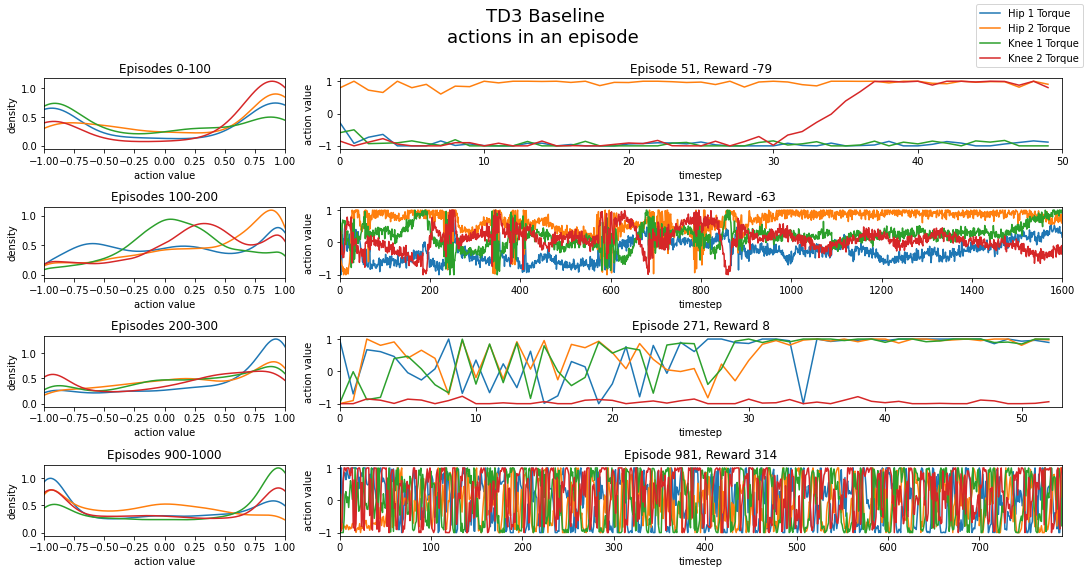

In [30]:
episodes = actions.keys()

timeframes = list(range(0, 1100, 100))
timeframe_sets = [[0, 100], [100, 200], [200, 300],[900, 1000]]

action_sets = defaultdict(list)

for start, end in timeframe_sets:
    episodes_between_range = [x for x in episodes if x >= start and x < end]
    actions_between_range = [actions[x] for x in episodes_between_range]
    combined_actions = list(chain.from_iterable(actions_between_range))
    
    action_sets[start, end] = combined_actions

# plot actions of various episodes
action_sets = action_sets
agent_name = 'TD3 Baseline'

# plot episode actions through several episodes and its density  
fig, axs = plt.subplots(nrows= len(action_sets), 
                          gridspec_kw={'width_ratios': [1, 3]},
                      ncols=2, figsize=(15, 8))
plt.subplots_adjust(hspace=1.1)

fig.suptitle(f"{agent_name}\nactions in an episode ", fontsize=18, y=0.99)
for k_episode_start_end, ax1, ax in zip(action_sets.keys(), axs.ravel()[::2], axs.ravel()[1::2]):
    # Get episode range
    k_episode_start, k_episode_end = k_episode_start_end[0], k_episode_start_end[1]
    # Store Results
    df = pd.DataFrame(action_sets[k_episode_start, k_episode_end])
    # Update Index
    df.index = np.arange(0, len(action_sets[k_episode_start, k_episode_end]), 1)
    
    # Get best episode in range
    best_idx = rewards[k_episode_start+1:k_episode_end+1:10].argmax()
    best_reward = rewards[k_episode_start+1:k_episode_end+1:10].max()
    best_idx = k_episode_start + 1 + (best_idx*10)
    best_episode_df = pd.DataFrame(actions[best_idx])
    
    # Plot best episode
    best_episode_df.plot(ax=ax)
    ax.set(xlabel='timestep', ylabel='action value', xlim=[0,len(actions[best_idx])])
    ax.title.set_text(f'Episode {best_idx}, Reward {int(best_reward)}')
    ax.get_legend().remove()
    
    # Plot action density
    df.plot(ax= ax1, kind='density')
    ax1.set(xlabel='action value', ylabel='density', xlim=[-1,1])
    ax1.title.set_text(f'Episodes {k_episode_start}-{k_episode_end}')
    ax1.get_legend().remove()


labels = ['Hip 1 Torque', 'Hip 2 Torque', 
        'Knee 1 Torque', 'Knee 2 Torque']
fig.legend(labels=labels, loc="upper right")

plt.tight_layout()

plt.savefig(root+"td3_baseline_actions_excerpt_smaller.jpeg", dpi=300, bbox_inches = "tight");

# Compare Builds

In [17]:
agents = [
          'td3_baseline_1000/ep_rewards_1000',
          'td3_priority_1000/ep_rewards_900',
         'td3_huber_loss_1000/ep_rewards_1000',
        'td3_small_buffer_1000/ep_rewards_1000',
        'td3_baseline_1000_hardcore/ep_rewards_1000',
        'DDPG_1000/ep_rewards_1200',
    'random_baseline_1000/ep_rewards_1001'
]

### Rewards
df_combined = pd.DataFrame(range(1001), columns = ['index'])

### Standard Deviation
df_std_combined = pd.DataFrame(range(1001), columns = ['index'])

for agent in agents:

    rewards = load_object(root + agent)

    df = pd.DataFrame(np.array(rewards).flatten())

    # Calculate Rolling Averages

    rolling_average = df.rolling(window=100).mean()
    
    rolling_average.column = agent.split('/')[0]
    
    agent_name = agent.split('/')[0]
    agent_name_claned = (agent_name
                         .replace('_1000', '')
                         .replace('_', ' ')
                         .title()
                         .replace('Td3', 'TD3')
                         .replace('Ddpg', 'DDPG')
                        )
    
    df_combined[agent_name_claned] = rolling_average
    
    # Standard Deviation
    
    rolling_average_std = df.rolling(window=100).std()

    df_std_combined[agent_name_claned] = rolling_average_std


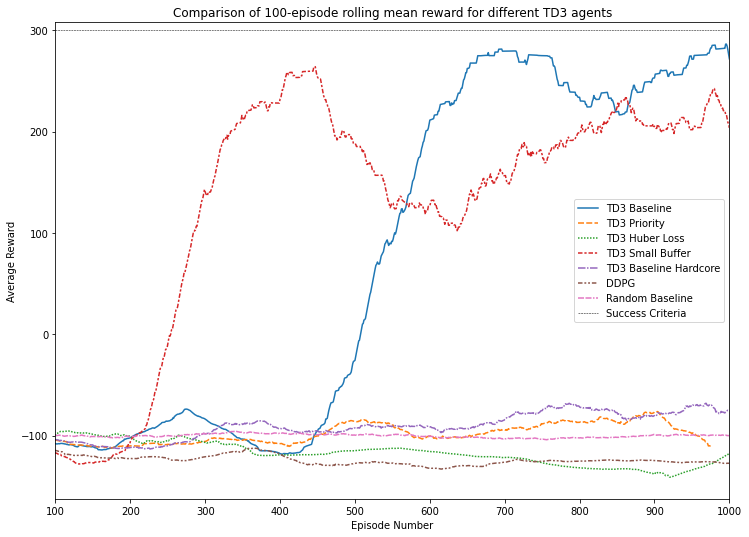

In [18]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=df_combined.drop('index', axis=1))

plt.axhline(300, color='black', label='Success Criteria', lw=0.5, ls='--')

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of 100-episode rolling mean reward for different TD3 agents')

# score_std_zip = zip(df_combined['TD3 Baseline'], df_std_combined['TD3 Baseline'])

# lower_bound = [average - std for average, std in score_std_zip]

# score_std_zip = zip(df_combined['TD3 Baseline'], df_std_combined['TD3 Baseline'])
# upper_bound = [average + std for average, std in score_std_zip]

# plt.fill_between(range(1001), lower_bound, upper_bound, alpha=.3)

plt.legend(loc='center right')

plt.xlim(100,1000)

plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# plt.savefig(root+"results_comparison.jpeg", dpi=300, bbox_inches = "tight")

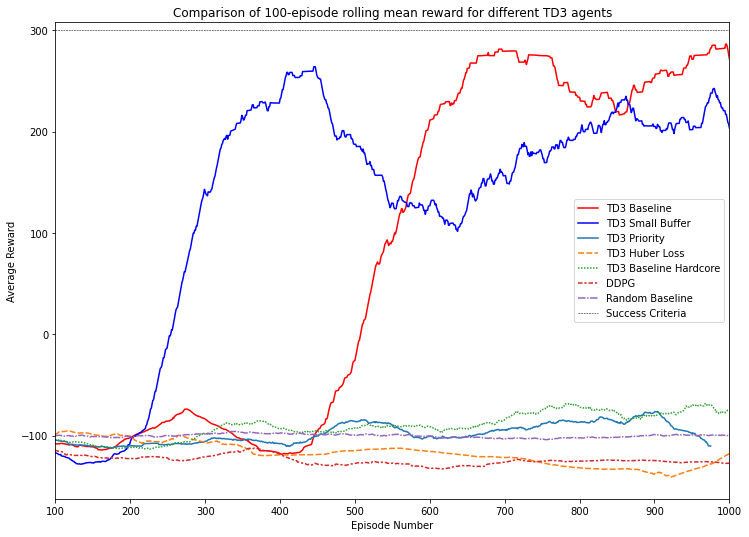

In [25]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=df_combined['TD3 Baseline'], color='red', label='TD3 Baseline')
sns.lineplot(ax=ax, data=df_combined['TD3 Small Buffer'], color='blue', label='TD3 Small Buffer')

sns.lineplot(ax=ax, data=df_combined.drop(['index', 'TD3 Baseline', 'TD3 Small Buffer'], axis=1))

plt.axhline(300, color='black', label='Success Criteria', lw=0.5, ls='--')

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of 100-episode rolling mean reward for different TD3 agents')

plt.legend(loc='center right')

plt.xlim(100,1000)

plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

plt.savefig(root+"results_comparison_presentation.jpeg", dpi=300, bbox_inches = "tight")

# Top Reward per Agent

In [7]:
max_score = df_combined.max()
max_idx = df_combined.idxmax()

top_results_per_agent = {}

for agent in df_combined.columns[1:]:
    top_results_per_agent[agent] = [max_score[agent], max_idx[agent]]

In [8]:
top_results_per_agent_df = pd.DataFrame(top_results_per_agent).astype(int)

top_results_per_agent_df.index = ['Top Score', 'At Episode No.']

top_results_per_agent_df

TD3 Baseline  TD3 Priority  TD3 Huber Loss  TD3 Small Buffer  \
Top Score                286           -76             -95               264   
At Episode No.           996           904             116               447   

                TD3 Baseline Hardcore  DDPG  Random Baseline  
Top Score                         -67  -112              -95  
At Episode No.                    786   366              341

# TD3 Baseline 5 Runs

In [10]:
agents = ['1_ep_rewards_1000',
          '2_ep_rewards_1000',
          '3_ep_rewards_1000',
          '4_ep_rewards_1000',
          '5_ep_rewards_1000'
]

### Rewards
# 'ep_rewards'

# dfs = []

dfs_std = []

df_combined = pd.DataFrame(range(1001), columns = ['index'])

df_std_combined = pd.DataFrame(range(1001), columns = ['index'])

for agent in agents:


    rewards = load_object(root + '/td3_baseline_multiple_runs/'+ agent)

    df = pd.DataFrame(np.array(rewards).flatten())

    # Calculate Rolling Averages

    rolling_average = df.rolling(window=100).mean()
    
    rolling_average.column = agent.split('/')[0]
    
    agent_name = agent.split('/')[0]
    agent_name_cleaned = (agent_name[0]
#                          .replace('_1000', '')
#                          .replace('_', ' ')
#                          .title()
#                          .replace('Td3', 'TD3')
#                          .replace('Ddpg', 'DDPG')
                        )
    
    df_combined[agent_name_cleaned] = rolling_average
    
    # Standard Deviation
    
    rolling_average_std = df.rolling(window=100).std()

    df_std_combined[agent_name_cleaned] = rolling_average_std
    
lower_std_bound = df_combined.mean(axis=1) - df_combined.std(axis=1)
higher_std_bound = df_combined.mean(axis=1) + df_combined.std(axis=1)

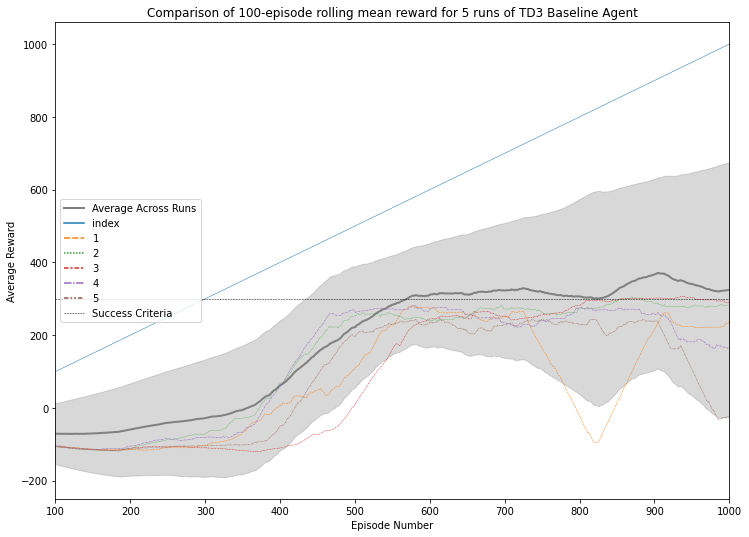

In [11]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=df_combined.mean(axis=1), label='Average Across Runs', lw=2, color='grey')

sns.lineplot(ax=ax, data=df_combined, lw=0.5)



plt.axhline(300, color='black', label='Success Criteria', lw=0.5, ls='--')

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of 100-episode rolling mean reward for 5 runs of TD3 Baseline Agent')

lower_std_bound = df_combined.mean(axis=1) - df_combined.std(axis=1)
higher_std_bound = df_combined.mean(axis=1) + df_combined.std(axis=1)

plt.fill_between(range(1001), lower_std_bound, higher_std_bound, alpha=.3,  color='grey')

plt.legend(loc='center left')

plt.xlim(100,1000)

plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# plt.savefig(root+"td3_multiple_runs.jpeg", dpi=300, bbox_inches = "tight")